| ![Logo](images/unilogo.png) |
|----------------------------------------------------------------------------|
| University of Greifswald physics department |

Mach-Zehnder Interferometer Lab
===============================================
Authored by: [Nathan Belmore](https://plasma.physics.berkeley.edu/faculty-staff/nathan-belmore) 
In partnership with Tobias Tubandt


# Abstract
***
The Mach Zehnder Interferometer is an apparatus that uses division of amplitude to generate measure path length or phase differences in a split light source. It can also be used to detect index of refractions in materials. In this experiment, we use a collimated light source and 2 beam splitters to create 2 paths for the light. Path length differences give rise to phase differences in the light, which in tern will impact the amplitude of the observed recombined beam. Mach Zehnder Interferometers can be used for many different applications like quantum entanglement, the quantum Zeno effect experiment, the quantum eraser among others. For our experiment we get to do something much more mundane, observing coherence fringes. 

# Physical Principles
***
For the following, we are assuming W$1$ for Way $1$ and W$2$ for Way $2$. Basic Idea for the experiment is to use several beam splitters to split the initial beam and redirect the parts for interference.

| ![Logo](images/manual.png) |
|----------------------------------------------------------------------------|
| Fig 1. This shows the basic setup for our experiment. The full line indicates a $100\%$ reflecting mirror and the dotted line a $50\%$ reflecting beam splitter. A and B are both screens. |

When considering the phase shift we would expect constructive or destructive interference. What we observe is interference fringes, given by the sum of the intensity of the two waves, which is calculated below, the deviation of which follows Zetei et. al[2].

\begin{align}
I 
&= \left< EE^* \right> = \left< (E_1 + E_2)(E_1 + E_2)^* \right> \\
&= \left< E_1 E_1^* \right> + \left< E_2 E_2^* \right> + \left< E_2 E_1^* \right> + \left< E_1 E_2^* \right> \\
&= I_1 + I_2 + 2 Re{\left< E_1^* E_2 \right>} \\
&= 2 I_1 + 2 Re{\left< E_1^* E_2 \right>}
\end{align}

The observed intensity is the sum of $I_1$ and the interference term given by the real part of $\left< E_1^* E_2 \right>$, where $E(t)$ is the superposition of the wave amplitudes from the two paths. Since $E_1$ and $E_2$ only vary by a phase we get the following relation: $E_2 = E_1(t+\tau)$. Using this relation we can define the complex self coherence function. 

\begin{align}
\Gamma(\tau) = \left< E_1^* E_2 \right> = \left< E_1^*(t) E_t(t + \tau) \right>
\end{align}

If we integrate out the $t$ dependence we get the following:

\begin{align}
\Gamma(\tau) = \left< E_1^* E_2 \right> = \left< E_1^*(t) E_t(t + \tau) \right>
\end{align}

# Execution and Setup
***
The setup can be seen in fig. 1. The first part of the experiment is to adjust the optics in our setup to have an actual pattern on the screen, which can be measured. The first data range is for an intensity swap. We are using the $\frac{\lambda}{4}$ plate on $0^\circ$ and $45^\circ$, also we range the analyzer from $0^\circ$ to $90^\circ$ and taking a picture with a CCD camera in $10^\circ$ intervals. Next step is the profile measurement $2$ $\frac{\lambda}{4}$ plates. While $1$ set to $0^\circ$ and the other ranging from $0^\circ$ to $90^\circ$. Measurements are done in $10^\circ$ intervals.

# Analysis
***



In [13]:
# creating the correct enviroment for analysis
import os
import numpy as np
import pandas as pd
from PIL import Image
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema, savgol_filter
import scipy.fftpack
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

### Importing the data

Some of the data sets contain multiple iterations, which are summed over to improve the statistics. 

In [34]:
# Path to the data set
pathi = 'data/intensity/'
pathp = 'data/profile/'

# Importing the intensity data.
# Some data structure for genetrating a list of the files. 
files = []

for file in os.listdir(pathi):
    if file.endswith(".bmp"):
        files.append(os.path.join(pathi, file))
files.sort()
# print('Files imported:')
# print(*files, sep='\n')

# Import the 1st intensity data to an array.
intensity1 = []
for file in files[0:10]:
    intensity1.append(np.array(Image.open(file)))

# Import the 2nd intensity data to an array.
intensity2 = []
for file in files[10:21]:
    intensity2.append(np.array(Image.open(file)))
    
# Importing the profile data.
# Some data structure for genetrating a list of the files. 
files = []

for file in os.listdir(pathp):
    if file.endswith(".bmp"):
        files.append(os.path.join(pathp, file))
files.sort()
# print('Files imported:')
# print(*files, sep='\n')

# Import the fringe data to an array.
profile = []
for file in files:
    profile.append(np.array(Image.open(file)))    

fringe = np.array(Image.open('data/001.bmp'))

## Task 1: Filter Intensity Measurements 1

With the quarter wave plate set to 45° and we took 10 measurements from 0° - 180° calculated the intensity. 

In [15]:
# Format the data for the plot.
y = [np.sum(i) for i in intensity1]
x = np.linspace(0, 90, num=10)

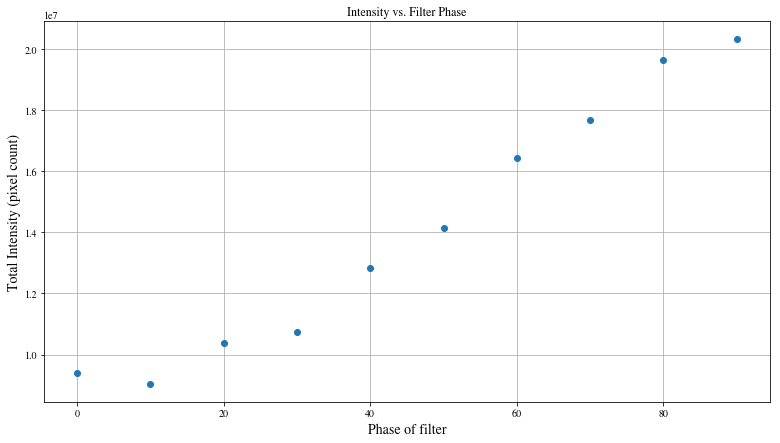

In [16]:
# Plot the results.
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(x, y[0:len(x)], 'o')
ax.set_xlabel('Phase of filter', fontsize=14)
ax.set_ylabel('Total Intensity (pixel count)', fontsize=14)
ax.set_title('Intensity vs. Filter Phase') 
ax.grid(True)

plt.show()

This result is not as expected. Because we expected circular polarization of the light prior to the filter, there shouldn't have been any amplitude change as a function of the filter phase. There must have been a mistake in the setup process or we have discovered something worthy of a Nobel Prize, but we'll settle for an A.

## Task 2: Filter Intensity Measurement 2

With the quarter wave plate set to 0° and we took 10 measurements from 0° - 90° calculated the intensity. 

In [17]:
# Format the data for the plot.
y = [np.sum(i) for i in intensity2]
x = np.linspace(0, 90, num=10)

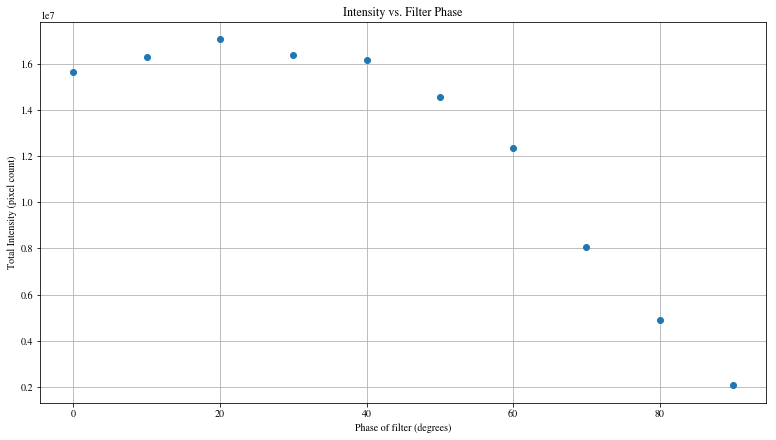

In [18]:
# Plot the results.
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(x, y[0:len(x)], 'o')
ax.set_xlabel('Phase of filter (degrees)')
ax.set_ylabel('Total Intensity (pixel count)')
ax.set_title('Intensity vs. Filter Phase') 
ax.grid(True)

plt.show()

As expected, the intensity decreased as a function of the filter phase. However, at $45^{\circ}$ we would have expected $\frac{\sqrt{2}}{2}$ of the max amplitude. Because we are averaging over the whole data set the noise floor is getting summed into the data points, which acts as a linear offset. However, this still wouldn't explain the lack of decay for the first $45^{\circ}$. From the data, it appears the max amplitude is around $20^{\circ}$, which means it could be there is a slight shift in our assumed polarization. If we assume a $20^{\circ}$ phase offset we get results much closer to expected.

## Task 3: Profile Measurement

With light moving along both paths we maximized the interference pattern. Below we will plot a 1D cross section of the data. The 1D cross section was selected to be roughly perpendicular with the right half of the fringes, as they appear to be well defined.

In [19]:
def path(img, ystart, yend, returnpath=False):
    """Creates a 1D cut of the 2D data set IMG between ystart and yend.
    
    img: 2D array
    
    ystart: Left most starting pixel for generating the 1D cut. (INT)
    
    yend: Right most ending pixel for generating the 1D cut. (INT)
    
    returnpath: If True, path will also return the y values of the path"""
    line = []
    ypath = []
    h, w = img.shape
    
    # Checking the case when ystart = yend
    if np.abs(yend-ystart) == 0:
        diff = 1
    else:
        diff = yend-ystart
        
    delta = w // diff
    for j in range(w):
        i = ystart + j // delta 
        line.append(img[i, j])
        ypath.append(i)
    if returnpath == True:
        return line, ypath
    else:
        return line

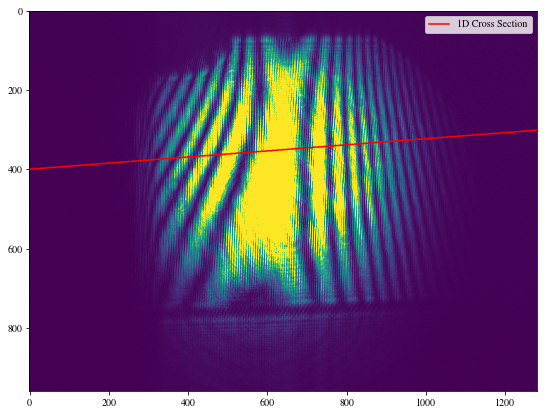

In [20]:
x = range(1280)
line, ypath = path(fringe, 400, 300, returnpath=True)

# Plotting the image with the 1D cross section
fig, ax = plt.subplots(figsize=(13, 7))
ax.imshow(fringe) 
ax.plot(x, ypath, color='r', label='1D Cross Section')
ax.legend()
plt.show()

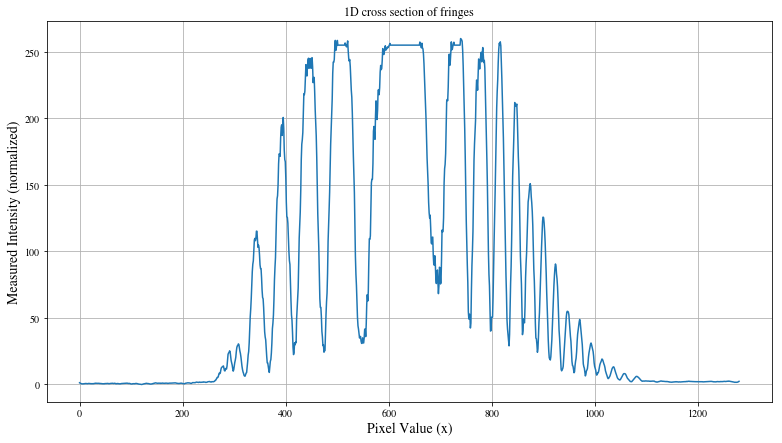

In [21]:
# Path through the image
y = path(fringe, 400, 300)
x = range(1280)

# Smoothing the results
y2 = savgol_filter(y, 15, 3) # window size 7, polynomial order 3

# Plotting the 1D slice
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('1D cross section of fringes')
ax.set_xlabel('Pixel Value (x)', fontsize=14)
ax.set_ylabel('Measured Intensity (normalized)', fontsize=14)
ax.plot(x, y2)
ax.grid(True)

plt.show()

### Interference Decay

We took 10 measurements between $0-90^{\circ}$ and recorded the images. By shifting the phase the phase of one of the filters, one of the paths of light is blocked, resulting in a loss of the interference pattern. We took the same 1D cross section for all 10 measurements, which was selected to be roughly perpendicular with the right half of the fringes. We plotted the resulting 1D curves below.

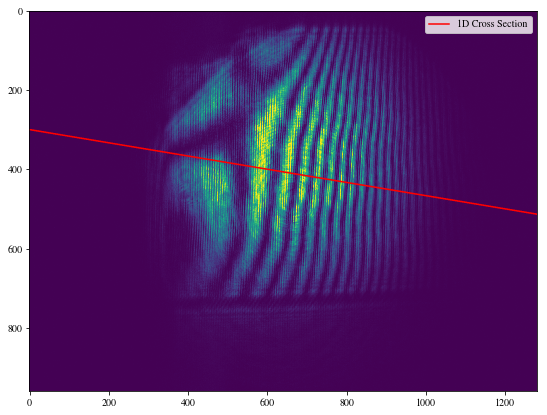

In [22]:
x = range(1280)
line, ypath = path(profile[0], 300, 500, returnpath=True)

# Plotting the image with the 1D cross section
fig, ax = plt.subplots(figsize=(13, 7))
ax.imshow(profile[0]) 
ax.plot(x, ypath, color='r', label='1D Cross Section')
ax.legend()
plt.show()

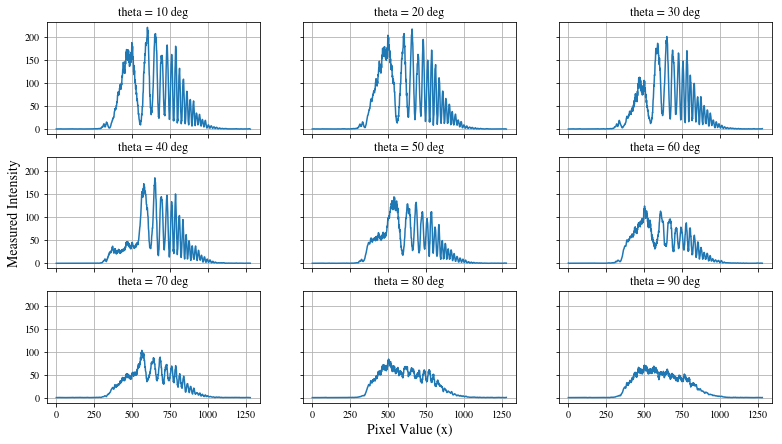

In [23]:
x = range(1280)

# Plot the 1D cross section. Each plot represents a different theta value.
# Since there isn't much change in the first few we used the set 2-10 below.
fig, ax = plt.subplots(3, 3, figsize=(13, 7), sharey=True, sharex=True)
for i in range(9):
    y = path(profile[i + 1], 300, 500)
    y2 = savgol_filter(y, 15, 3)
    ax[i//3, i%3].plot(x, y2)
    ax[i//3, i%3].grid(True)
    ax[i//3, i%3].set_title(f'theta = {10 + i * 10} deg')

ax[2, 1].set_xlabel('Pixel Value (x)', fontsize=14)
ax[1, 0].set_ylabel('Measured Intensity', fontsize=14)
plt.show()

The right half of the curve is more representative of the interference pattern. There are many possible metrics to get a sense of how the interference pattern decays as a function of the phase. The easiest one to apply here is looking at the max amplitude of the data over a range of the fringes. We normalized the the results to the max amplitude of the camera. 

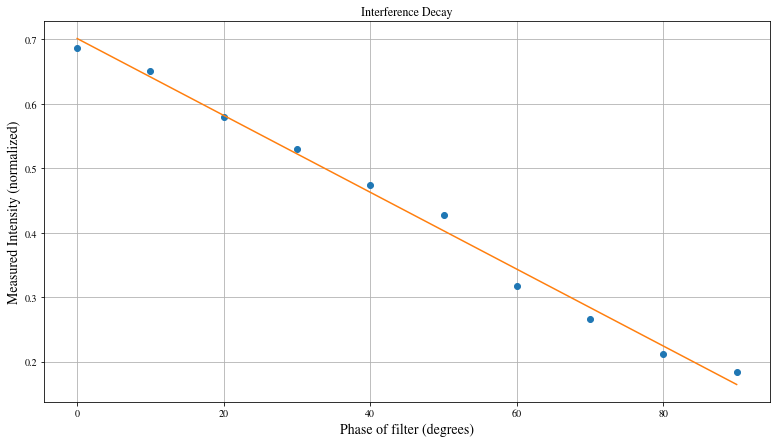

(-0.005965537732437909, -9.62263558869535e-05)

In [33]:
# Generate the interference results
y = [(np.max(profile[i][600:800]) - np.min(profile[i][600:800]))/255 for i in range(len(profile))] 
x = np.linspace(0, 90, num=10)

# Function we are interested in fitting
def linear(θ, m, b):
    """Function (9) as defined in the lab notebook."""
    return m * θ + b

# Fitting and plotting the results
popt, pcov = curve_fit(linear, x, y)

# Plot interference decay
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Interference Decay')
ax.set_xlabel('Phase of filter (degrees)', fontsize=14)
ax.set_ylabel('Measured Intensity (normalized)', fontsize=14)
ax.plot(x, y, 'o')
ax.plot(x, linear(x, *popt))
ax.grid(True)
plt.show()

# Calculating the standard deviation of the fit
σ = np.std(y - linear(x, *popt))

# Returning the slope and the error on the slope.
popt[0], σ * popt[0]

As expected, the interference decays when one of the paths of light is blocked. We have a measured decay of $-0.006 \pm 9.6e^{-5}$ (intensity % / degree). 

# Conclusion
***
There were some inconsistencies in our expected results. The amplitudes for the first measurement were clearly incorrect. One other issue was a 20 degree phase shift measured in the filter intensity measurement. However, we were able to achieve a profile measurement of the fringe pattern and demonstrated decoherence by blocking one of the paths using polarized filters. Using that data we calculated the decay rate of $-0.006 \pm 9.6e^{-5}$ (intensity % / degree). 

For future labs it would be interesting to have the hardware to do a little more than just examine the fringes. 

# References
***
[1] Lab Book

[2] Zetie, K.P. & Adams, S.F. & Tocknell, R.M.. (2000). How does a Mach-Zehnder interferometer work?. Physics Education. 35. 10.1088/0031-9120/35/1/308. 
